## 확률분포 vs Kmeans

In [ ]:
#데이터프레임 만들기
df_1=pd.read_csv('/content/drive/MyDrive/anmly_dtcion_rst_1.csv')
df_2=pd.read_csv('/content/drive/MyDrive/anmly_dtcion_rst_2.csv')
df_3=pd.read_csv('/content/drive/MyDrive/anmly_dtcion_rst_3.csv')
df=pd.concat([df_1,df_2,df_3])
df=df.reset_index(drop=True)

_targets=pd.DataFrame({'category':all_data.targets})
df=pd.concat([df,_targets],axis=1)
df=df.drop(columns={'Unnamed: 0'})
df['address']=[os.path.basename(address) for address,_ in all_data.imgs]

In [ ]:
df1=df[["address","category","predict"]]
df1['address']=df1['address'].str.replace('.jpg',"").str.replace('.png',"")
df1=df1.rename(columns = {"predict":"predict1"})
df1

address  category  predict1
0      aamhfbsxjoqkqsxnnpoy         0         0
1      aatdcomdixgejmiibsft         0         0
2      aatmmprdzkzdkbfcslkx         0         0
3      abaoovbyxzqodvhoasko         0         0
4      abymagsohyagiheolkhk         0         0
...                     ...       ...       ...
25498  zslxpqgjoxxxnfcgaqbc        19         0
25499  ztedlwqpolocumvrpkdt        19         0
25500  zukfkicrimhykqtrxkbe        19         0
25501  zvpheaqohuqevixkjspd        19         0
25502  zwioxnzjuiufsjztftts        19         0

[25503 rows x 3 columns]

In [ ]:
sum(df1.predict1)

2201

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/K-means 결과 1022.csv")
df2

Unnamed: 0               address  predict
0               0  niphdldxenmutzqtmrad        1
1               1  jgwzufcgmtmqkchhphmb        0
2               2  bjrzyurzzfgnuxrjwtpv        0
3               3  gjdnsvfoyzojtvgvxmab        0
4               4  qussiulhwozkxeveevjn        0
...           ...                   ...      ...
25498       25498  xazvpjwaydqrbvpjbvul        0
25499       25499  nuvykcocsxhgpchadiik        0
25500       25500  yifaakzphsggoouohtan        0
25501       25501  bzzgdseklzecfcoujbaf        0
25502       25502  dtxfpcggpnrgqolnmdoy        0

[25503 rows x 3 columns]

In [ ]:
df2=df2.drop(columns = ["Unnamed: 0"])
#df2['predict']=df2.predict.map({0:1,1:0})
df2

address  predict
0      niphdldxenmutzqtmrad        1
1      jgwzufcgmtmqkchhphmb        0
2      bjrzyurzzfgnuxrjwtpv        0
3      gjdnsvfoyzojtvgvxmab        0
4      qussiulhwozkxeveevjn        0
...                     ...      ...
25498  xazvpjwaydqrbvpjbvul        0
25499  nuvykcocsxhgpchadiik        0
25500  yifaakzphsggoouohtan        0
25501  bzzgdseklzecfcoujbaf        0
25502  dtxfpcggpnrgqolnmdoy        0

[25503 rows x 2 columns]

In [ ]:
sum(df2.predict==1)

2423

In [ ]:
predict2 = []
for ad in df1.address.values:
  if ad in df2.address.values:
    #predict2.append()
    predict2.append(df2[df2['address']==ad].predict.values[0])
  else:
    predict2.append(0)

In [ ]:
df_total=df1.copy()

In [ ]:
df_total["predict2"] = predict2
df_total

address  category  predict1  predict2
0      aamhfbsxjoqkqsxnnpoy         0         0         0
1      aatdcomdixgejmiibsft         0         0         0
2      aatmmprdzkzdkbfcslkx         0         0         0
3      abaoovbyxzqodvhoasko         0         0         0
4      abymagsohyagiheolkhk         0         0         0
...                     ...       ...       ...       ...
25498  zslxpqgjoxxxnfcgaqbc        19         0         0
25499  ztedlwqpolocumvrpkdt        19         0         0
25500  zukfkicrimhykqtrxkbe        19         0         0
25501  zvpheaqohuqevixkjspd        19         0         0
25502  zwioxnzjuiufsjztftts        19         0         0

[25503 rows x 4 columns]

이상치탐지를 수행한 클래스들에 대해서만 따로빼서 동일한 결과가 얼마나 나왔는지 확인하기 위한 코드<br><br>
수정 2022-10-23
이상치가 있는 클래스들에 대해서만 동일한 결과가 얼마나 있는지 확인하기 위한 코드

In [ ]:
tmp_df=df_total[(df_total.category ==8) | (df_total.category ==1) | (df_total.category ==5) | (df_total.category ==14) | (df_total.category ==18)]

In [ ]:
tmp_df

address  category  predict1  predict2
1893   aafgfromrjkwyqxwbqez         1         1         1
1894   acbmwoudccanheidbujk         1         1         1
1895   adabjancbngwjrrgdrgm         1         1         1
1896   adttahjwbrqymuqzkpxj         1         1         1
1897   aeqyqistsxyfxqhtlsaz         1         1         1
...                     ...       ...       ...       ...
25116  zuuerjxfazszuyczjful        18         0         0
25117  zwuvcrnsldklvhbvweik        18         0         0
25118  zxsifwdqfazxzpvvbfxq        18         1         1
25119  zypiuqrfdflxtiqvbkmj        18         0         0
25120  zysabvtbmeyirrplnuzf        18         0         0

[3269 rows x 4 columns]

두 모델의 예측결과가 95% 동일!
-> 94로 내려감 !<br><br>
수정 2022-10-23
모든클래스에 대해서 학습한결과, 96%(동일하게 예측한 비율)

두 모델이 결과가 다른건 어떤 이미지인가?

In [ ]:
print(f'데이터 기존 이미지 갯수 : {len(df)}')
print(f'확률분포모델에서 실제사진이라 판단한 이미지 : {sum(df_total.predict1==1)}')
print(f'확률분포모델에서 추상이미지라 판단한 이미지 : {len(df_total)-sum(df_total.predict1==1)}')
print(f'K-means모델에서 실제사진이라 판단한 이미지 : {sum(df_total.predict2==1)}')
print(f'K-means모델에서 추상이미지라 판단한 이미지 : {len(df_total)-sum(df_total.predict2==1)}')
print(f'전체데이터에서 두 모델이 동일하게 분류한 비율: {np.mean(df_total.predict1 == df_total.predict2)}')
print(f'이상치가 존재하는 클래스에서 두 모델이 동일하게 분류한 비율 {sum(tmp_df.predict1 == tmp_df.predict2)/len(tmp_df)}')

데이터 기존 이미지 갯수 : 25503
확률분포모델에서 실제사진이라 판단한 이미지 : 2201
확률분포모델에서 추상이미지라 판단한 이미지 : 23302
K-means모델에서 실제사진이라 판단한 이미지 : 2423
K-means모델에서 추상이미지라 판단한 이미지 : 23080
전체데이터에서 두 모델이 동일하게 분류한 비율: 0.9844724150099988
이상치가 존재하는 클래스에서 두 모델이 동일하게 분류한 비율 0.9681859895992658


### 다르게 판단한 이미지들

In [ ]:
diff_predict_indices=df_total[df_total.predict1 != df_total.predict2]
print(f'전체 데이터에서 다르게 판단한 이미지의 갯수 : {len(diff_predict_indices)}')

전체 데이터에서 다르게 판단한 이미지의 갯수 : 396


In [ ]:
df_total

address  category  predict1  predict2
0      aamhfbsxjoqkqsxnnpoy         0         0         0
1      aatdcomdixgejmiibsft         0         0         0
2      aatmmprdzkzdkbfcslkx         0         0         0
3      abaoovbyxzqodvhoasko         0         0         0
4      abymagsohyagiheolkhk         0         0         0
...                     ...       ...       ...       ...
25498  zslxpqgjoxxxnfcgaqbc        19         0         0
25499  ztedlwqpolocumvrpkdt        19         0         0
25500  zukfkicrimhykqtrxkbe        19         0         0
25501  zvpheaqohuqevixkjspd        19         0         0
25502  zwioxnzjuiufsjztftts        19         0         0

[25503 rows x 4 columns]

In [ ]:
diff_predict_indices=df_total[df_total.predict1 != df_total.predict2].index
diff_df=df_total.iloc[diff_predict_indices,:]
diff_df

address  category  predict1  predict2
11     adketuwinjndjaqrrzho         0         0         1
57     asjxvuunbzusockndamb         0         0         1
86     bazrppsqgrbfckudjxrt         0         0         1
124    bodolyegtcqppphglcfe         0         0         1
141    bvtpnzewuzizqmgnpkne         0         0         1
...                     ...       ...       ...       ...
25400  tkvkcnbrerbshohrduok        19         0         1
25410  tuxofzepeoyiwdjihpyd        19         0         1
25426  uofllrldcbgrddoautrc        19         0         1
25436  vesbsayjzpexbfrvprpz        19         0         1
25488  yyexhfajytbxwflbvlxd        19         0         1

[396 rows x 4 columns]

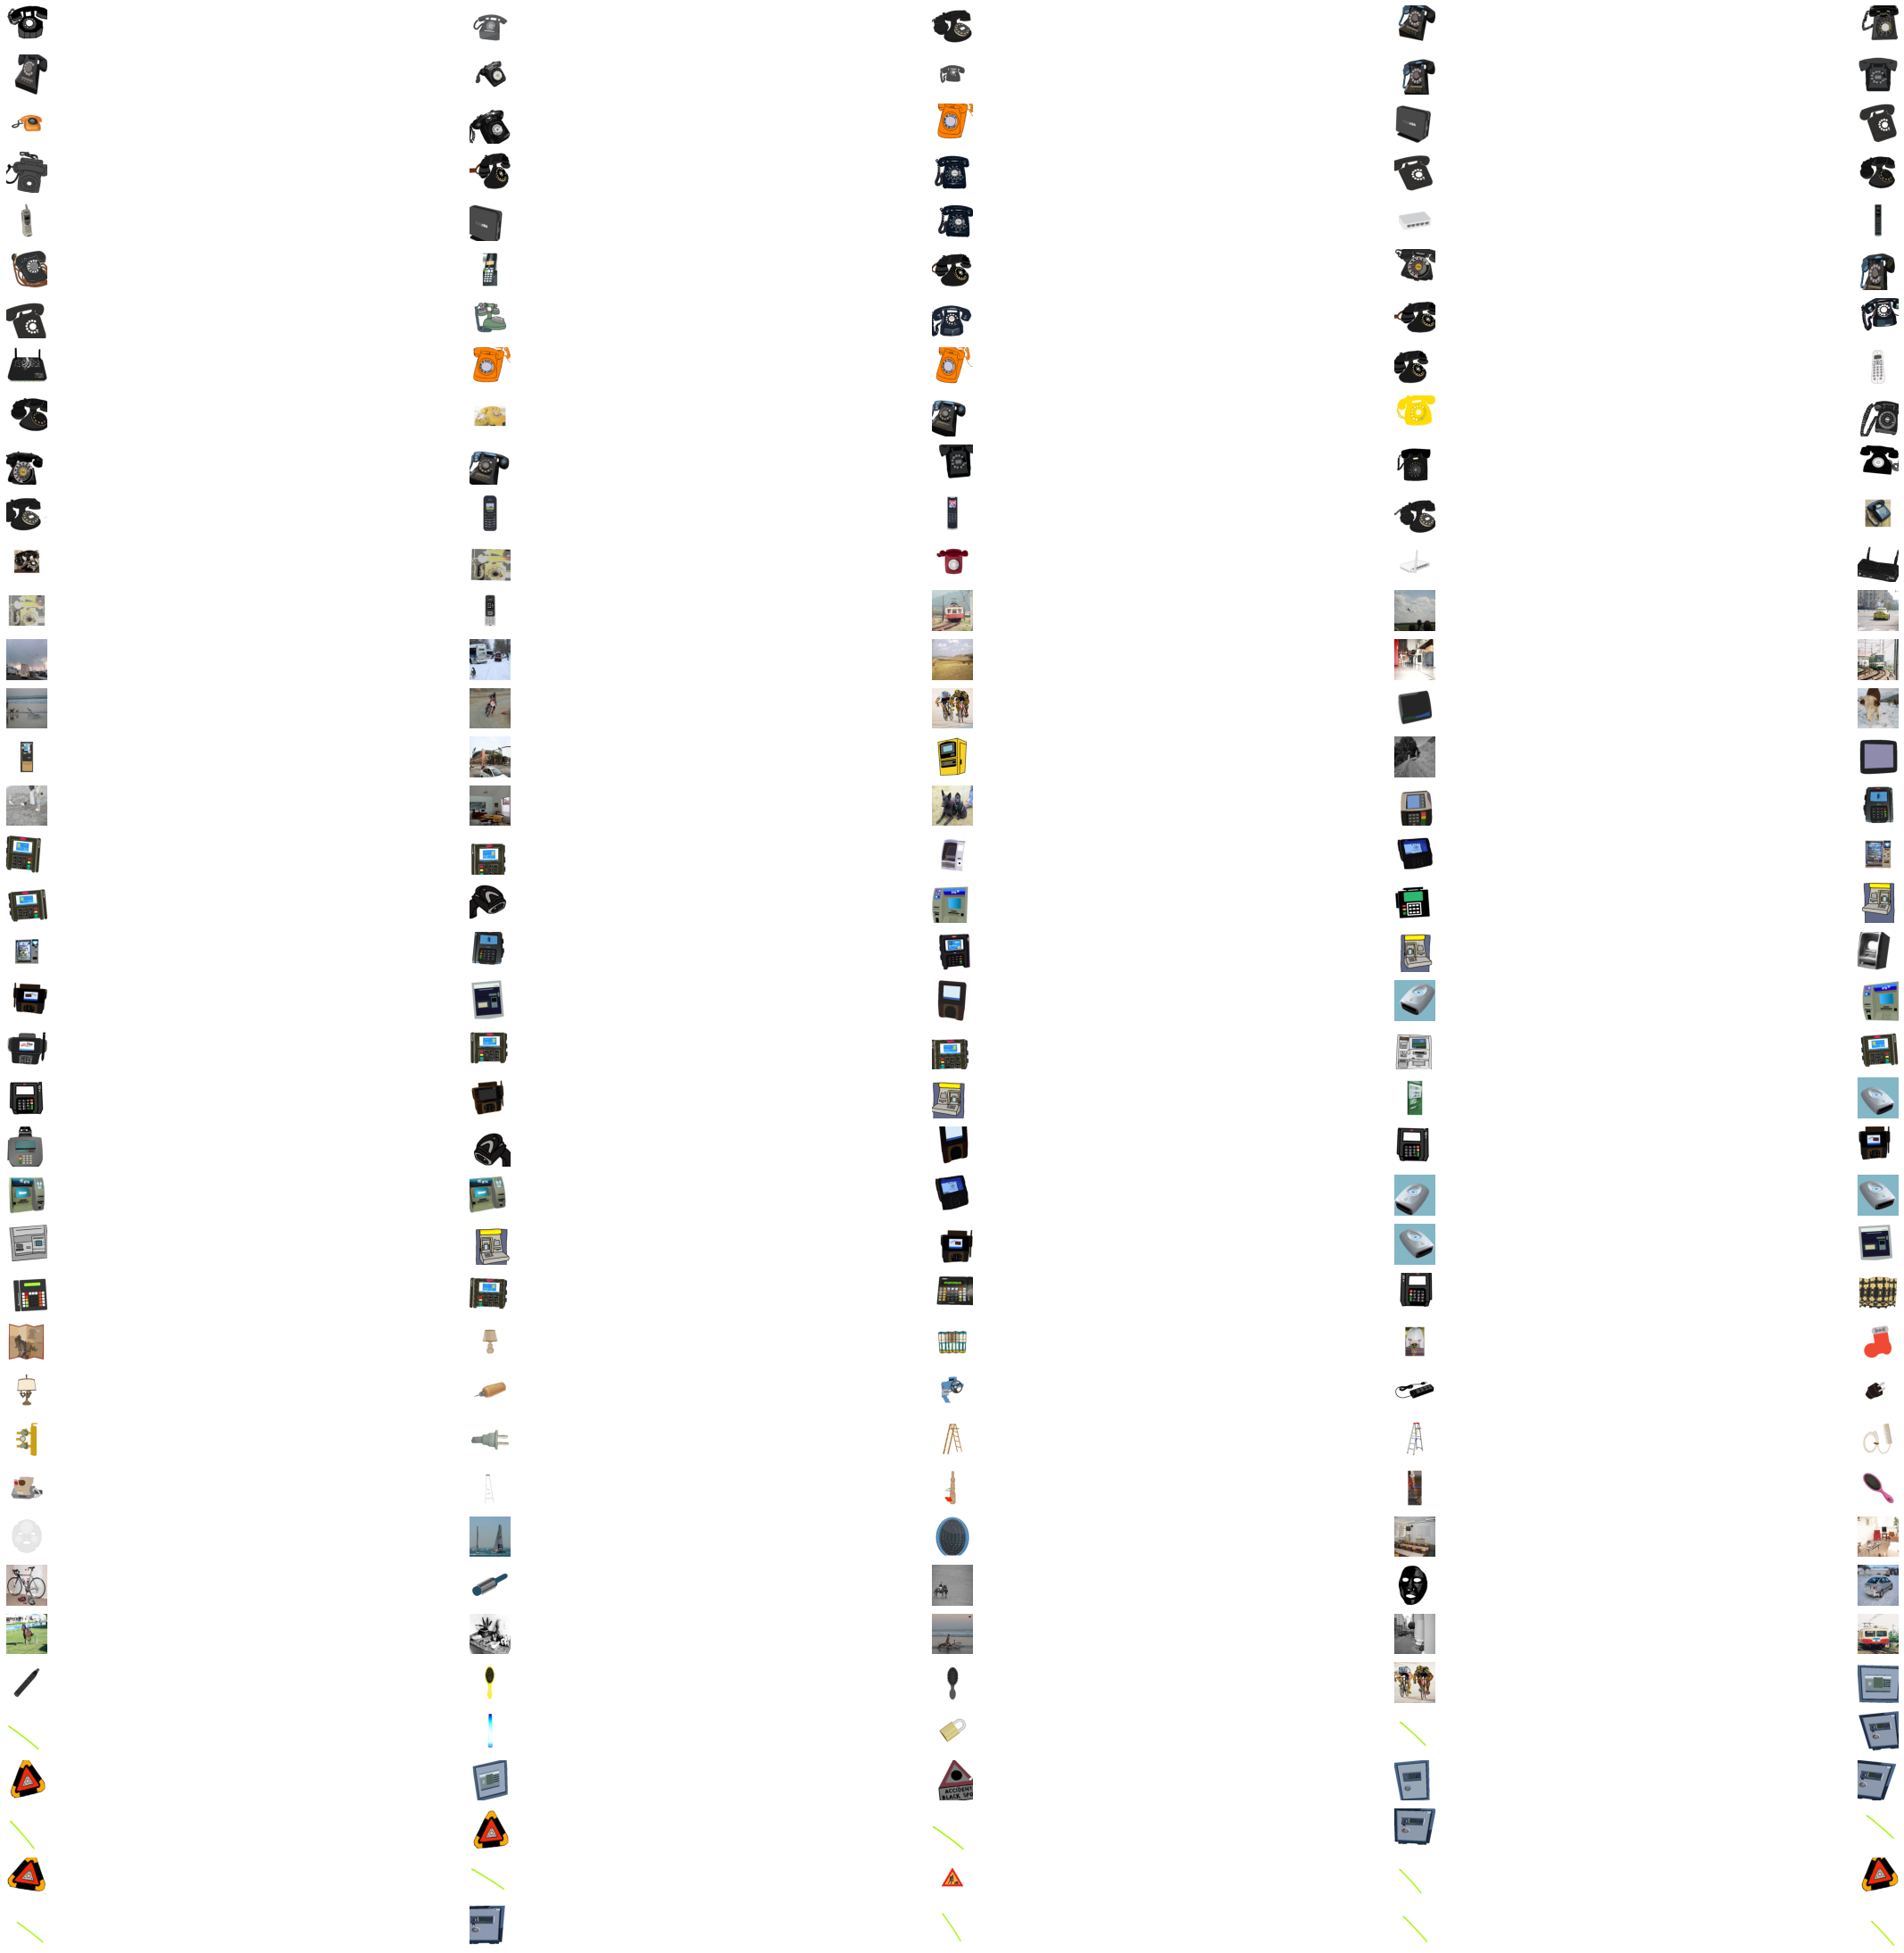

In [ ]:
imgs=get_imgs(all_data,diff_predict_indices[:200])
show_images2(imgs)

### 해석
####왜 다르게 판단?
1) 확률분포 모델의 경우 x값이 0.5이상인 지점에서 임계값을 R,G,B에서 모두 넘으면 추상이미지로 판단,아닐경우 실제사진으로 판단. 즉, 흰색깔이 적은 이미지가 실제사진임.<br>
2) K-means의 경우 흑백변환을 먼저하고 K값을 2로둬서 검은색인 군집과 흰색인 군집을 만드는 것 같음. 그래서 검은색이 많이있는 군집을 이상치로 판단. 그렇게 하여 제거되었음.즉, K-means는 검은색이 많은 이미지가 실제사진임
####보팅기준?
실제사진(이상치)는 추상이미지보다는 흰색의 비율이 적고 또한 검은색의 비율이 실제사진보다는 많다고 추정.


## 확률분포 vs YOLO

In [ ]:
#yolo 이상치탐지 결과 읽기
_yolo = pd.read_csv("/content/drive/MyDrive/anmly_dtctn_by_yolo.csv")
_yolo = _yolo.drop(columns = {"Unnamed: 0"})
_yolo

address
0     estolpofzhyytbuznsvn
1     yblzhncbvoyerxztsfgm
2     zqtormrjfymrbcmqvbrq
3     wbrbtjdmxnhhrbkmqxxw
4     kvisitbodygfpnpnjglf
...                    ...
2143  ezohpeivibzejiorwosq
2144  uehhbgclrdhrnrkuuenj
2145  ydrgzeodhlseaudseplp
2146  trksvxrtzrrrbbmcznvz
2147  izuohbjqmejuwtfqulcv

[2148 rows x 1 columns]

In [ ]:
df_total

address  category  predict1  predict2
0      aamhfbsxjoqkqsxnnpoy         0         0         0
1      aatdcomdixgejmiibsft         0         0         0
2      aatmmprdzkzdkbfcslkx         0         0         0
3      abaoovbyxzqodvhoasko         0         0         0
4      abymagsohyagiheolkhk         0         0         0
...                     ...       ...       ...       ...
25498  zslxpqgjoxxxnfcgaqbc        19         0         0
25499  ztedlwqpolocumvrpkdt        19         0         0
25500  zukfkicrimhykqtrxkbe        19         0         0
25501  zvpheaqohuqevixkjspd        19         0         0
25502  zwioxnzjuiufsjztftts        19         0         0

[25503 rows x 4 columns]

In [ ]:
yolo_detect_answer = []
for ad in df_total.address:
  if ad in _yolo.address.values:
    yolo_detect_answer.append(1)
  else:
    yolo_detect_answer.append(0)

In [ ]:
yolo_answer = np.array(yolo_detect_answer)
df_total["predict3"] = yolo_answer
df_total

address  category  predict1  predict2  predict3
0      aamhfbsxjoqkqsxnnpoy         0         0         0         0
1      aatdcomdixgejmiibsft         0         0         0         0
2      aatmmprdzkzdkbfcslkx         0         0         0         0
3      abaoovbyxzqodvhoasko         0         0         0         0
4      abymagsohyagiheolkhk         0         0         0         0
...                     ...       ...       ...       ...       ...
25498  zslxpqgjoxxxnfcgaqbc        19         0         0         0
25499  ztedlwqpolocumvrpkdt        19         0         0         0
25500  zukfkicrimhykqtrxkbe        19         0         0         0
25501  zvpheaqohuqevixkjspd        19         0         0         0
25502  zwioxnzjuiufsjztftts        19         0         0         0

[25503 rows x 5 columns]

In [ ]:
tmp_df=df_total[(df_total.category ==8) | (df_total.category ==1) | (df_total.category ==5) | (df_total.category ==14) | (df_total.category ==18)]
tmp_df

address  category  predict1  predict2  predict3
1893   aafgfromrjkwyqxwbqez         1         1         1         0
1894   acbmwoudccanheidbujk         1         1         1         1
1895   adabjancbngwjrrgdrgm         1         1         1         1
1896   adttahjwbrqymuqzkpxj         1         1         1         1
1897   aeqyqistsxyfxqhtlsaz         1         1         1         1
...                     ...       ...       ...       ...       ...
25116  zuuerjxfazszuyczjful        18         0         0         0
25117  zwuvcrnsldklvhbvweik        18         0         0         0
25118  zxsifwdqfazxzpvvbfxq        18         1         1         1
25119  zypiuqrfdflxtiqvbkmj        18         0         0         0
25120  zysabvtbmeyirrplnuzf        18         0         0         0

[3269 rows x 5 columns]

In [ ]:
print(f'데이터 기존 이미지 갯수 : {len(df)}')
print(f'확률분포모델에서 실제사진이라 판단한 이미지 : {sum(df_total.predict1==1)}')
print(f'확률분포모델에서 추상이미지라 판단한 이미지 : {len(df_total)-sum(df_total.predict1==1)}')
print(f'Yolo모델에서 실제사진이라 판단한 이미지 : {sum(df_total.predict3==1)}')
print(f'Yolo모델에서 추상이미지라 판단한 이미지 : {len(df_total)-sum(df_total.predict3==1)}')
print(f'전체데이터에서 두 모델이 동일하게 분류한 비율: {np.mean(df_total.predict1 == df_total.predict3)}')
print(f'이상치가 존재하는 클래스에서 두 모델이 동일하게 분류한 비율 {sum(tmp_df.predict1 == tmp_df.predict3)/len(tmp_df)}')

데이터 기존 이미지 갯수 : 25503
확률분포모델에서 실제사진이라 판단한 이미지 : 2201
확률분포모델에서 추상이미지라 판단한 이미지 : 23302
Yolo모델에서 실제사진이라 판단한 이미지 : 2148
Yolo모델에서 추상이미지라 판단한 이미지 : 23355
전체데이터에서 두 모델이 동일하게 분류한 비율: 0.9738462141708819
이상치가 존재하는 클래스에서 두 모델이 동일하게 분류한 비율 0.9629856225145305


### 다르게 판단한 이미지들

In [ ]:
diff3 = df_total[df_total.predict1 != df_total.predict3]
diff_indices2 = diff3.index
diff_indices2

Int64Index([   33,    36,    79,    80,    87,    89,   102,   170,   214,
              225,
            ...
            24760, 24824, 24876, 24954, 24979, 25115, 25259, 25384, 25406,
            25476],
           dtype='int64', length=667)

In [ ]:
diff3

address  category  predict1  predict2  predict3
33     amciivgxjoagcydlzvot         0         1         1         0
36     amixvvxcbjsunejbypqu         0         1         1         0
79     ayfkbqycvxosdoorkiii         0         1         1         0
80     ayhvjsjlovsjdudaeswa         0         1         1         0
87     bbfurfimzjxfskhzhmtg         0         1         1         0
...                     ...       ...       ...       ...       ...
25115  zudkxopuxiiuknlkxjub        18         0         1         1
25259  izuohbjqmejuwtfqulcv        19         0         0         1
25384  sioiqglbzlkybnmomiun        19         1         1         0
25406  trksvxrtzrrrbbmcznvz        19         0         0         1
25476  ydrgzeodhlseaudseplp        19         0         0         1

[667 rows x 5 columns]

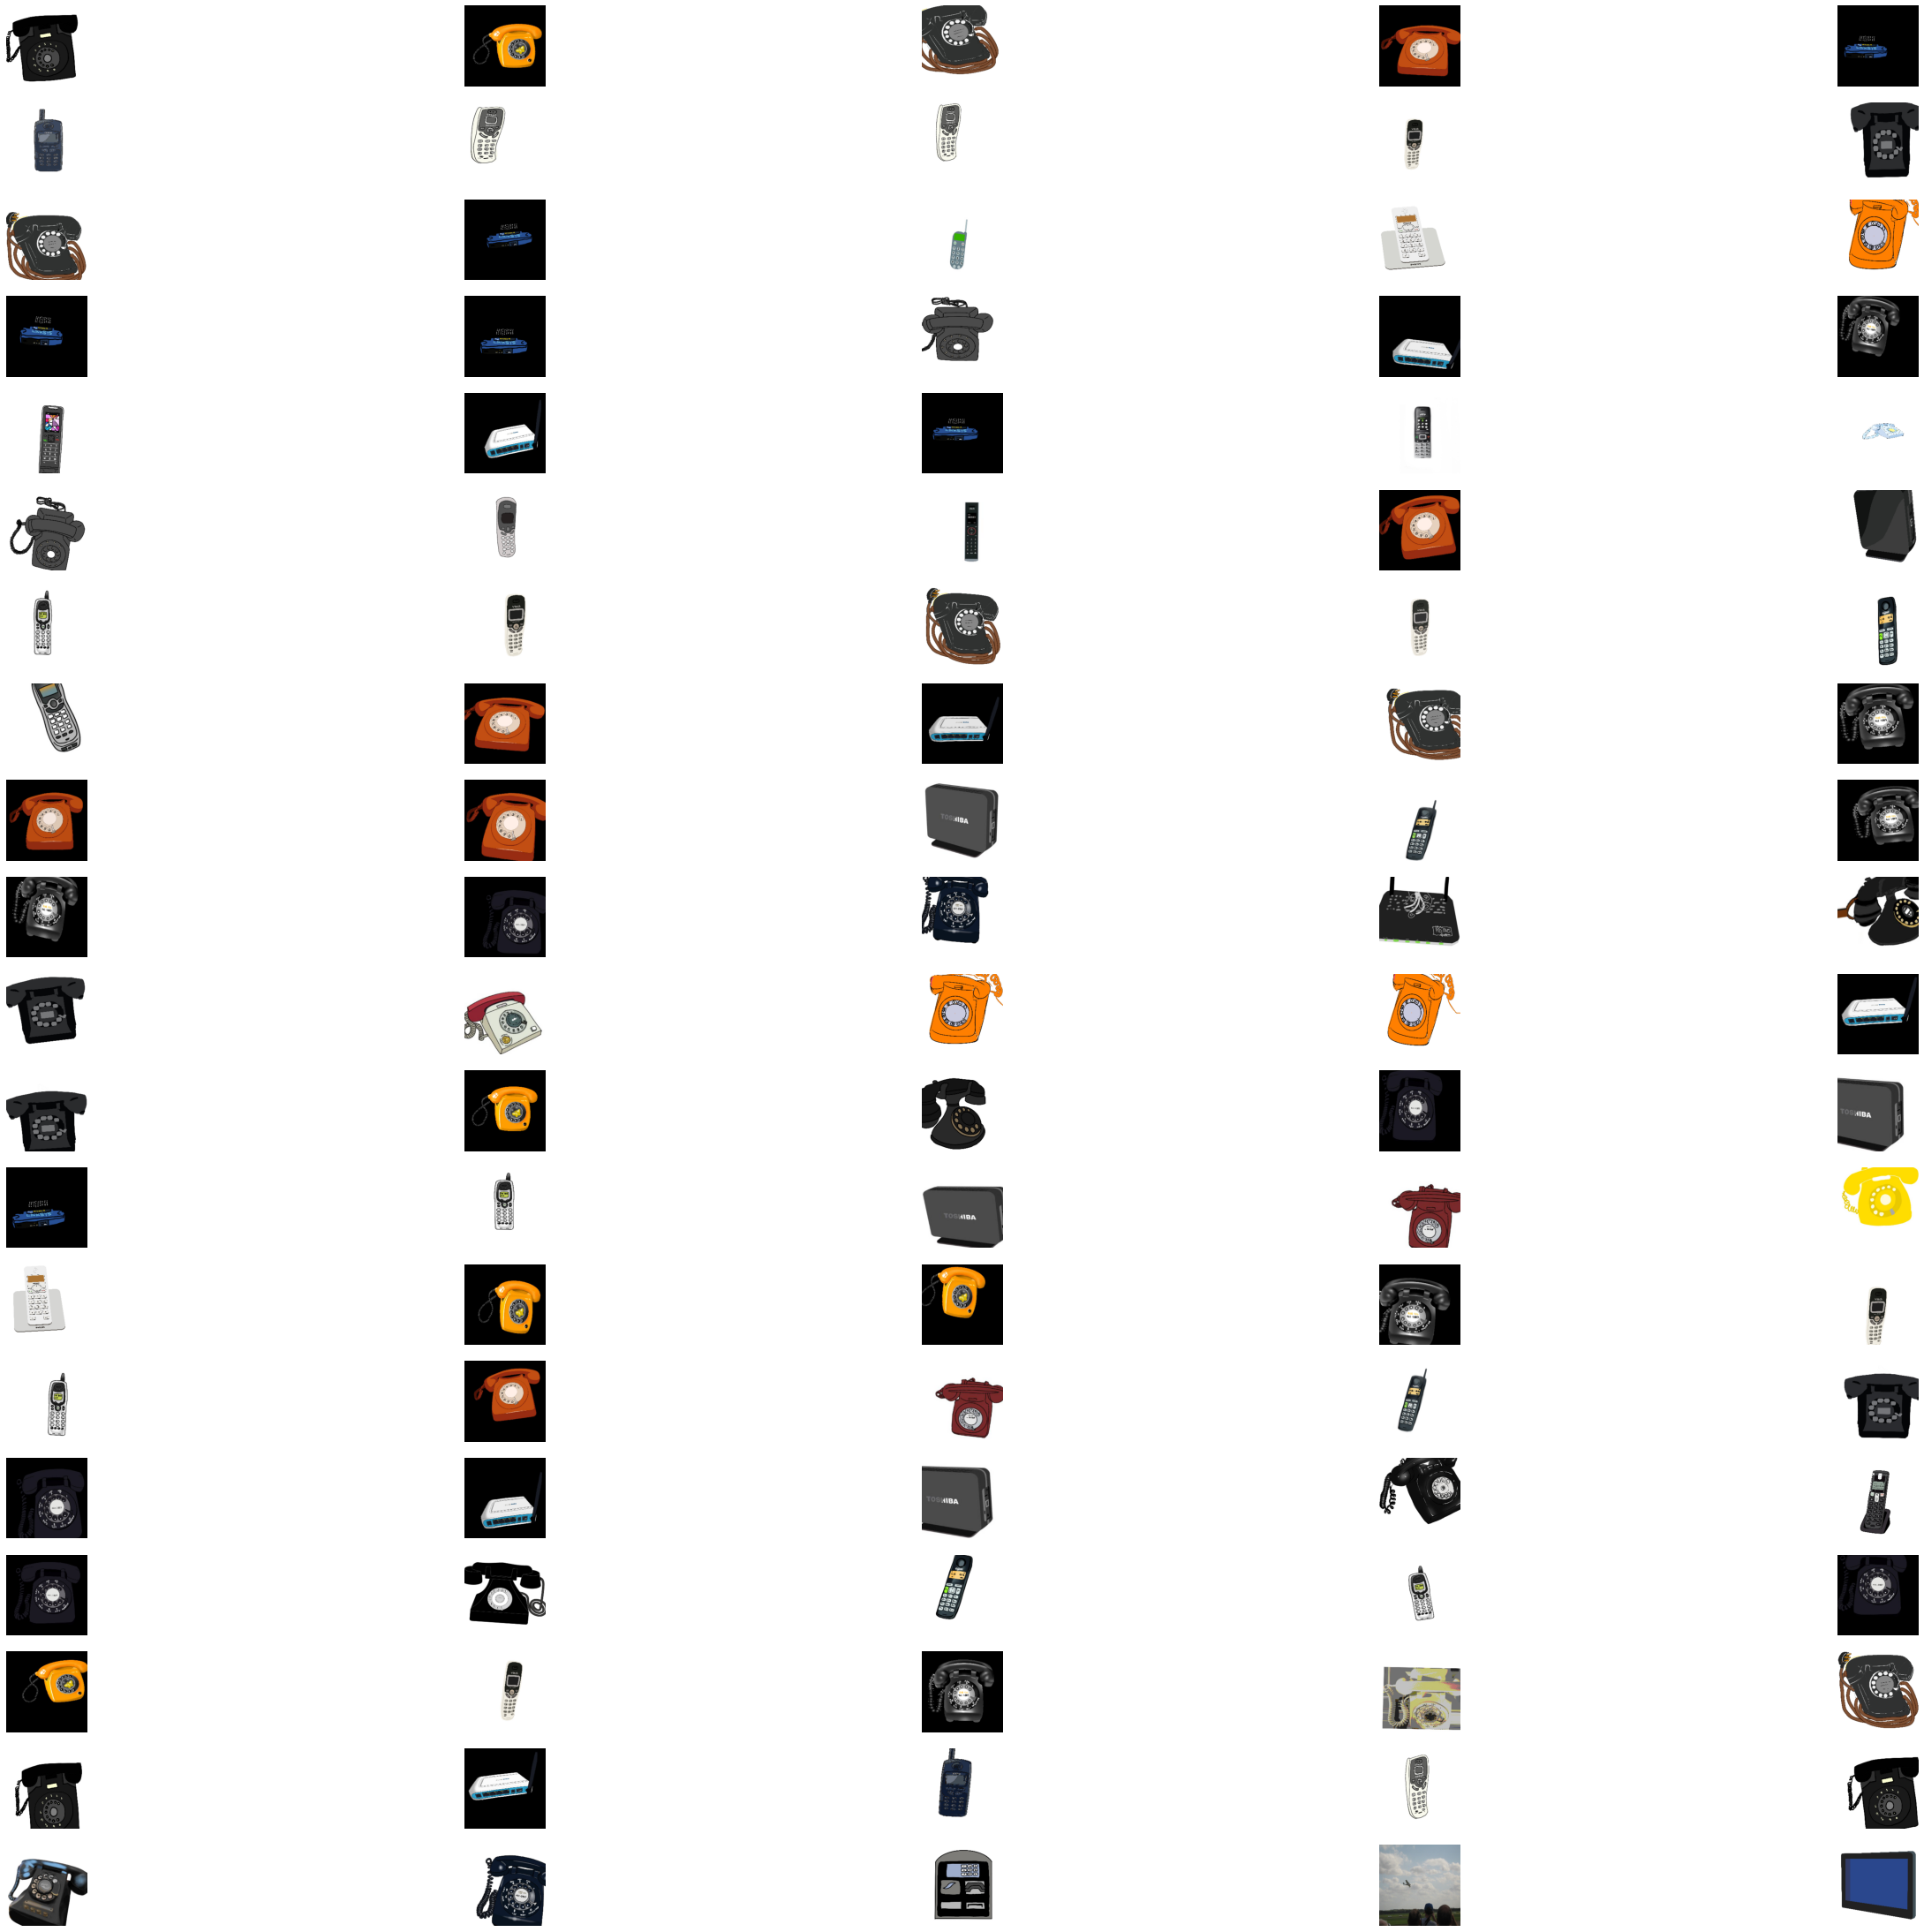

In [ ]:
imgs=get_imgs(all_data,diff_indices2[:100])
show_images2(imgs)

In [ ]:
diff3.iloc[:100,:]

address  category  predict1  predict2  predict3
33    amciivgxjoagcydlzvot         0         1         1         0
36    amixvvxcbjsunejbypqu         0         1         1         0
79    ayfkbqycvxosdoorkiii         0         1         1         0
80    ayhvjsjlovsjdudaeswa         0         1         1         0
87    bbfurfimzjxfskhzhmtg         0         1         1         0
...                    ...       ...       ...       ...       ...
1811  ywlrehayzcscjrimdemk         0         1         1         0
1849  zfyybvyufxbhuugbynpq         0         1         1         0
1893  aafgfromrjkwyqxwbqez         1         1         1         0
1911  argvjikzhulcqbfxlcdx         1         0         1         1
1958  dcixxqlvtgwozugkpxeo         1         1         1         0

[100 rows x 5 columns]

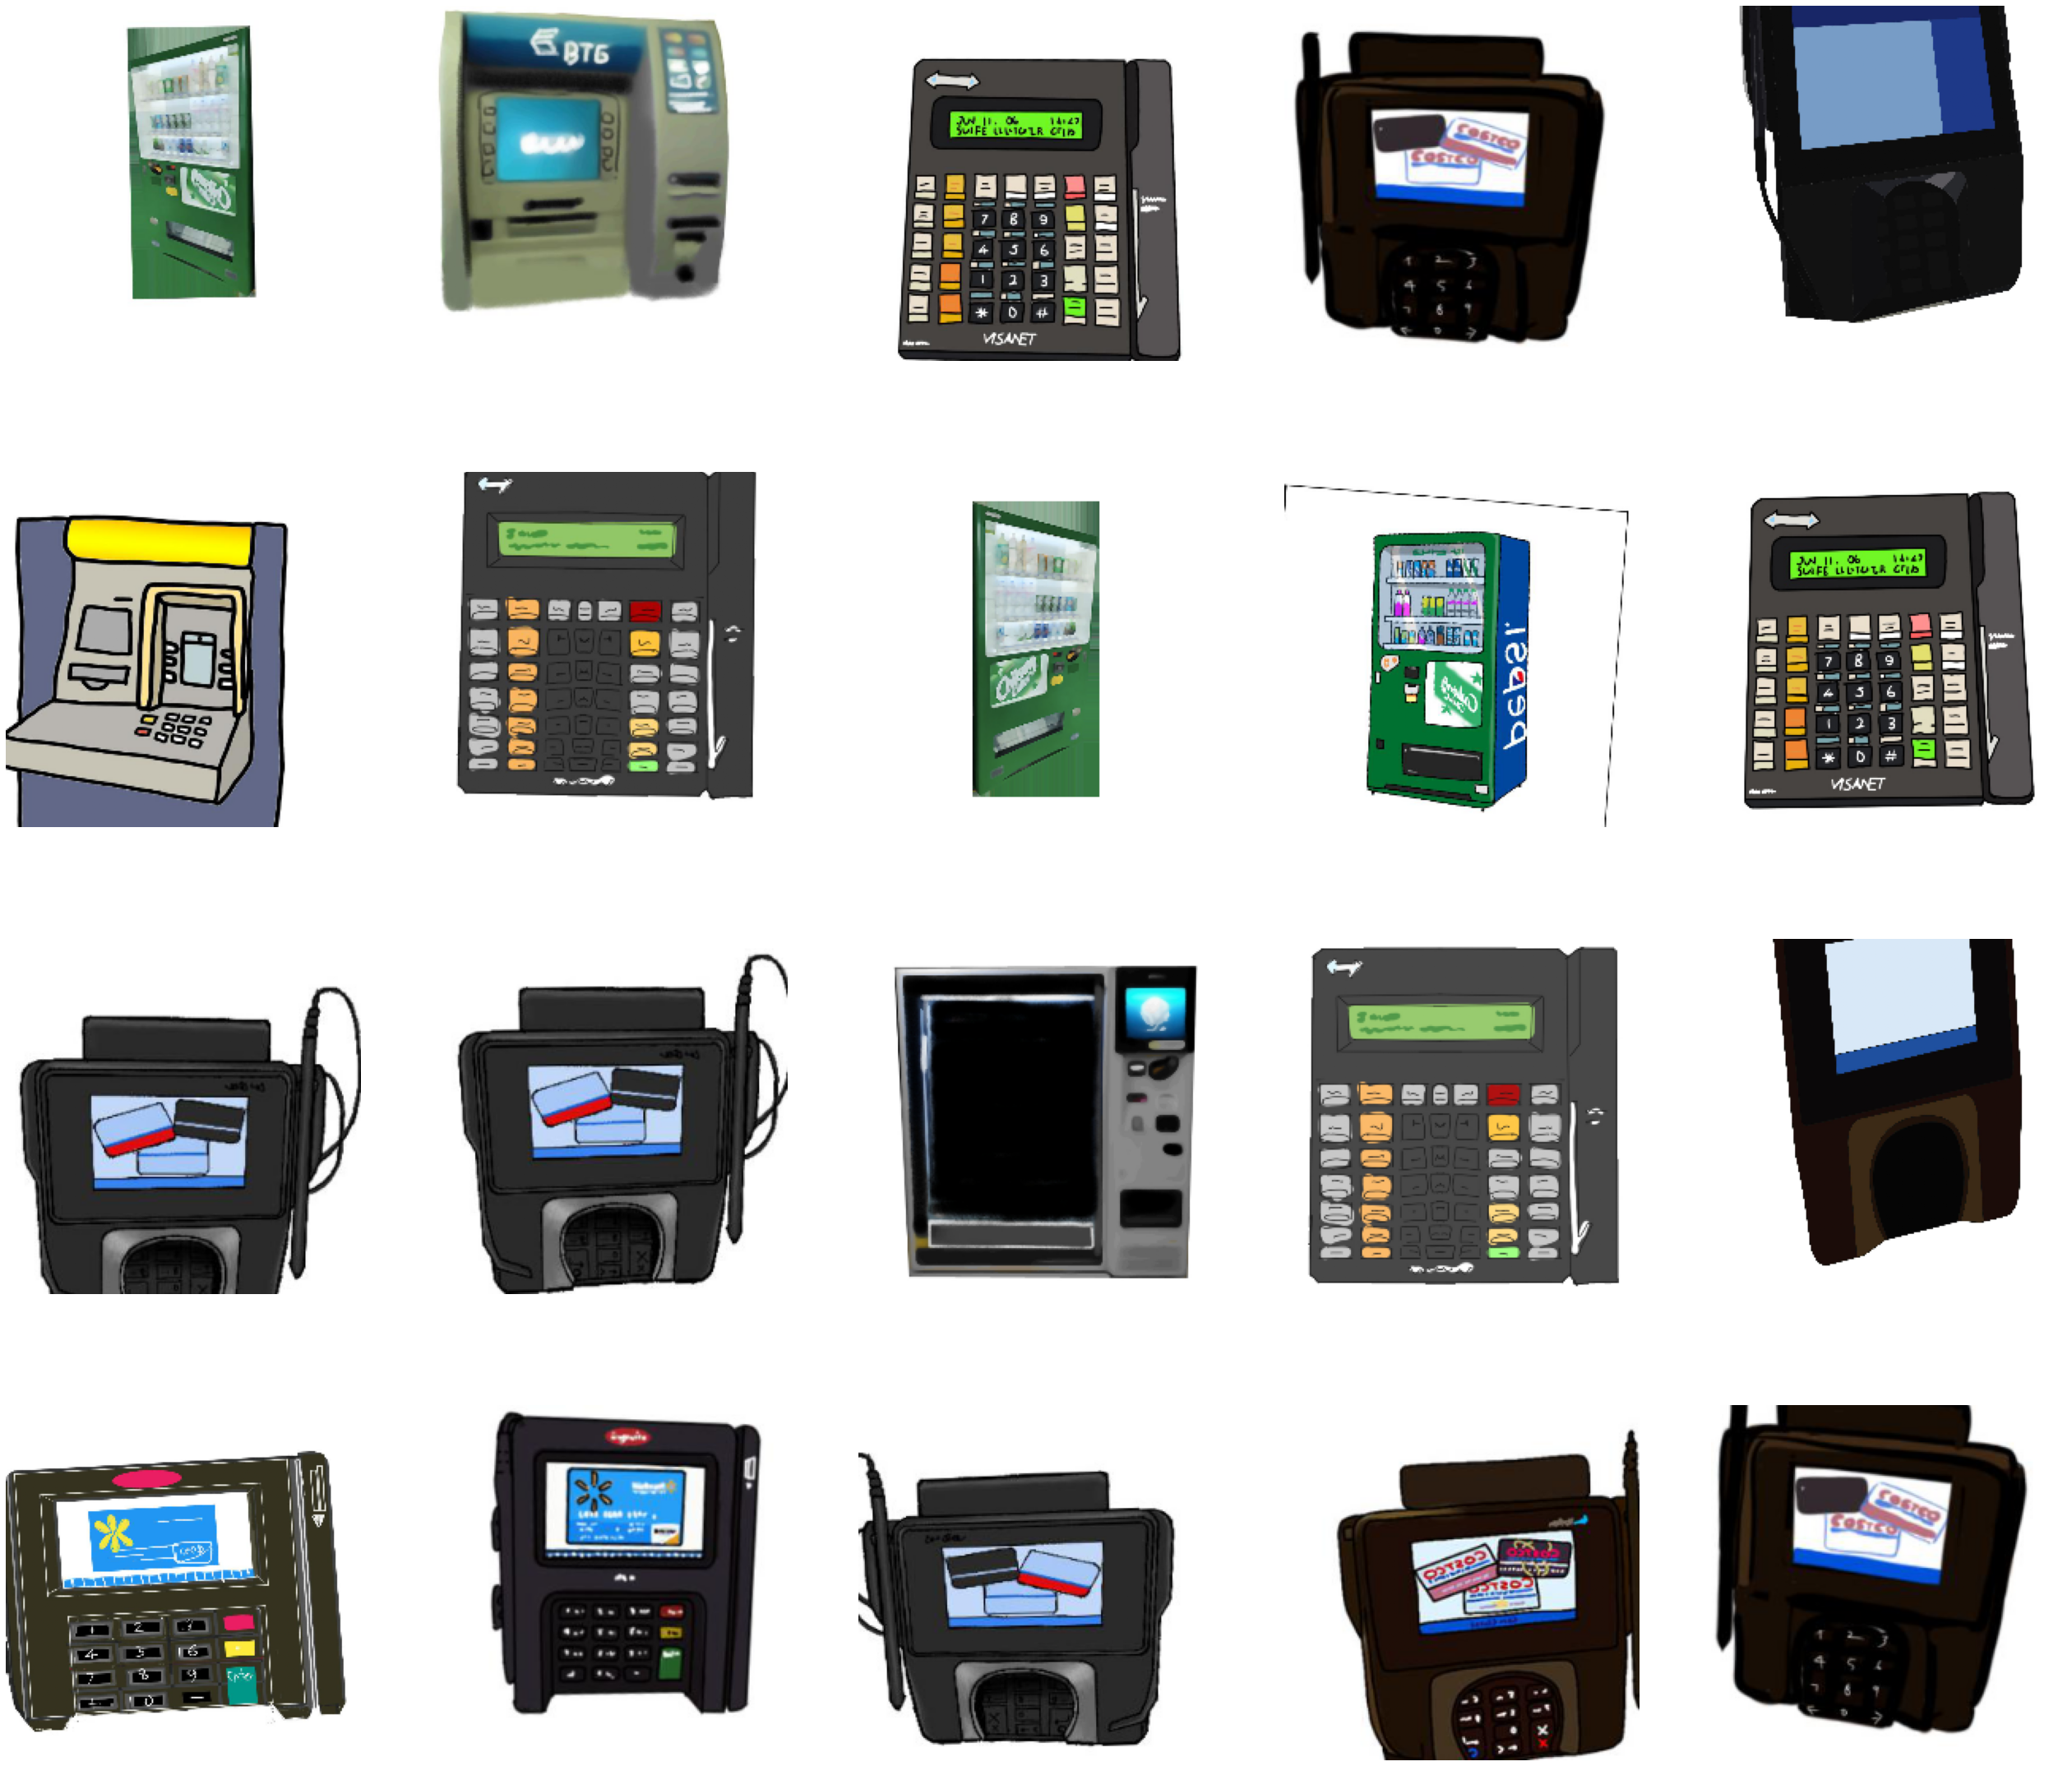

In [ ]:
imgs=get_imgs(all_data,diff_indices2[180:200])
show_images2(imgs)

In [ ]:
print(diff3.iloc[180:200,:].predict3.values)
print(diff3.iloc[180:200,:].predict2.values)
print(diff3.iloc[180:200,:].predict1.values)

#YOLO 2
#2model 2

[1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1]
[0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1]


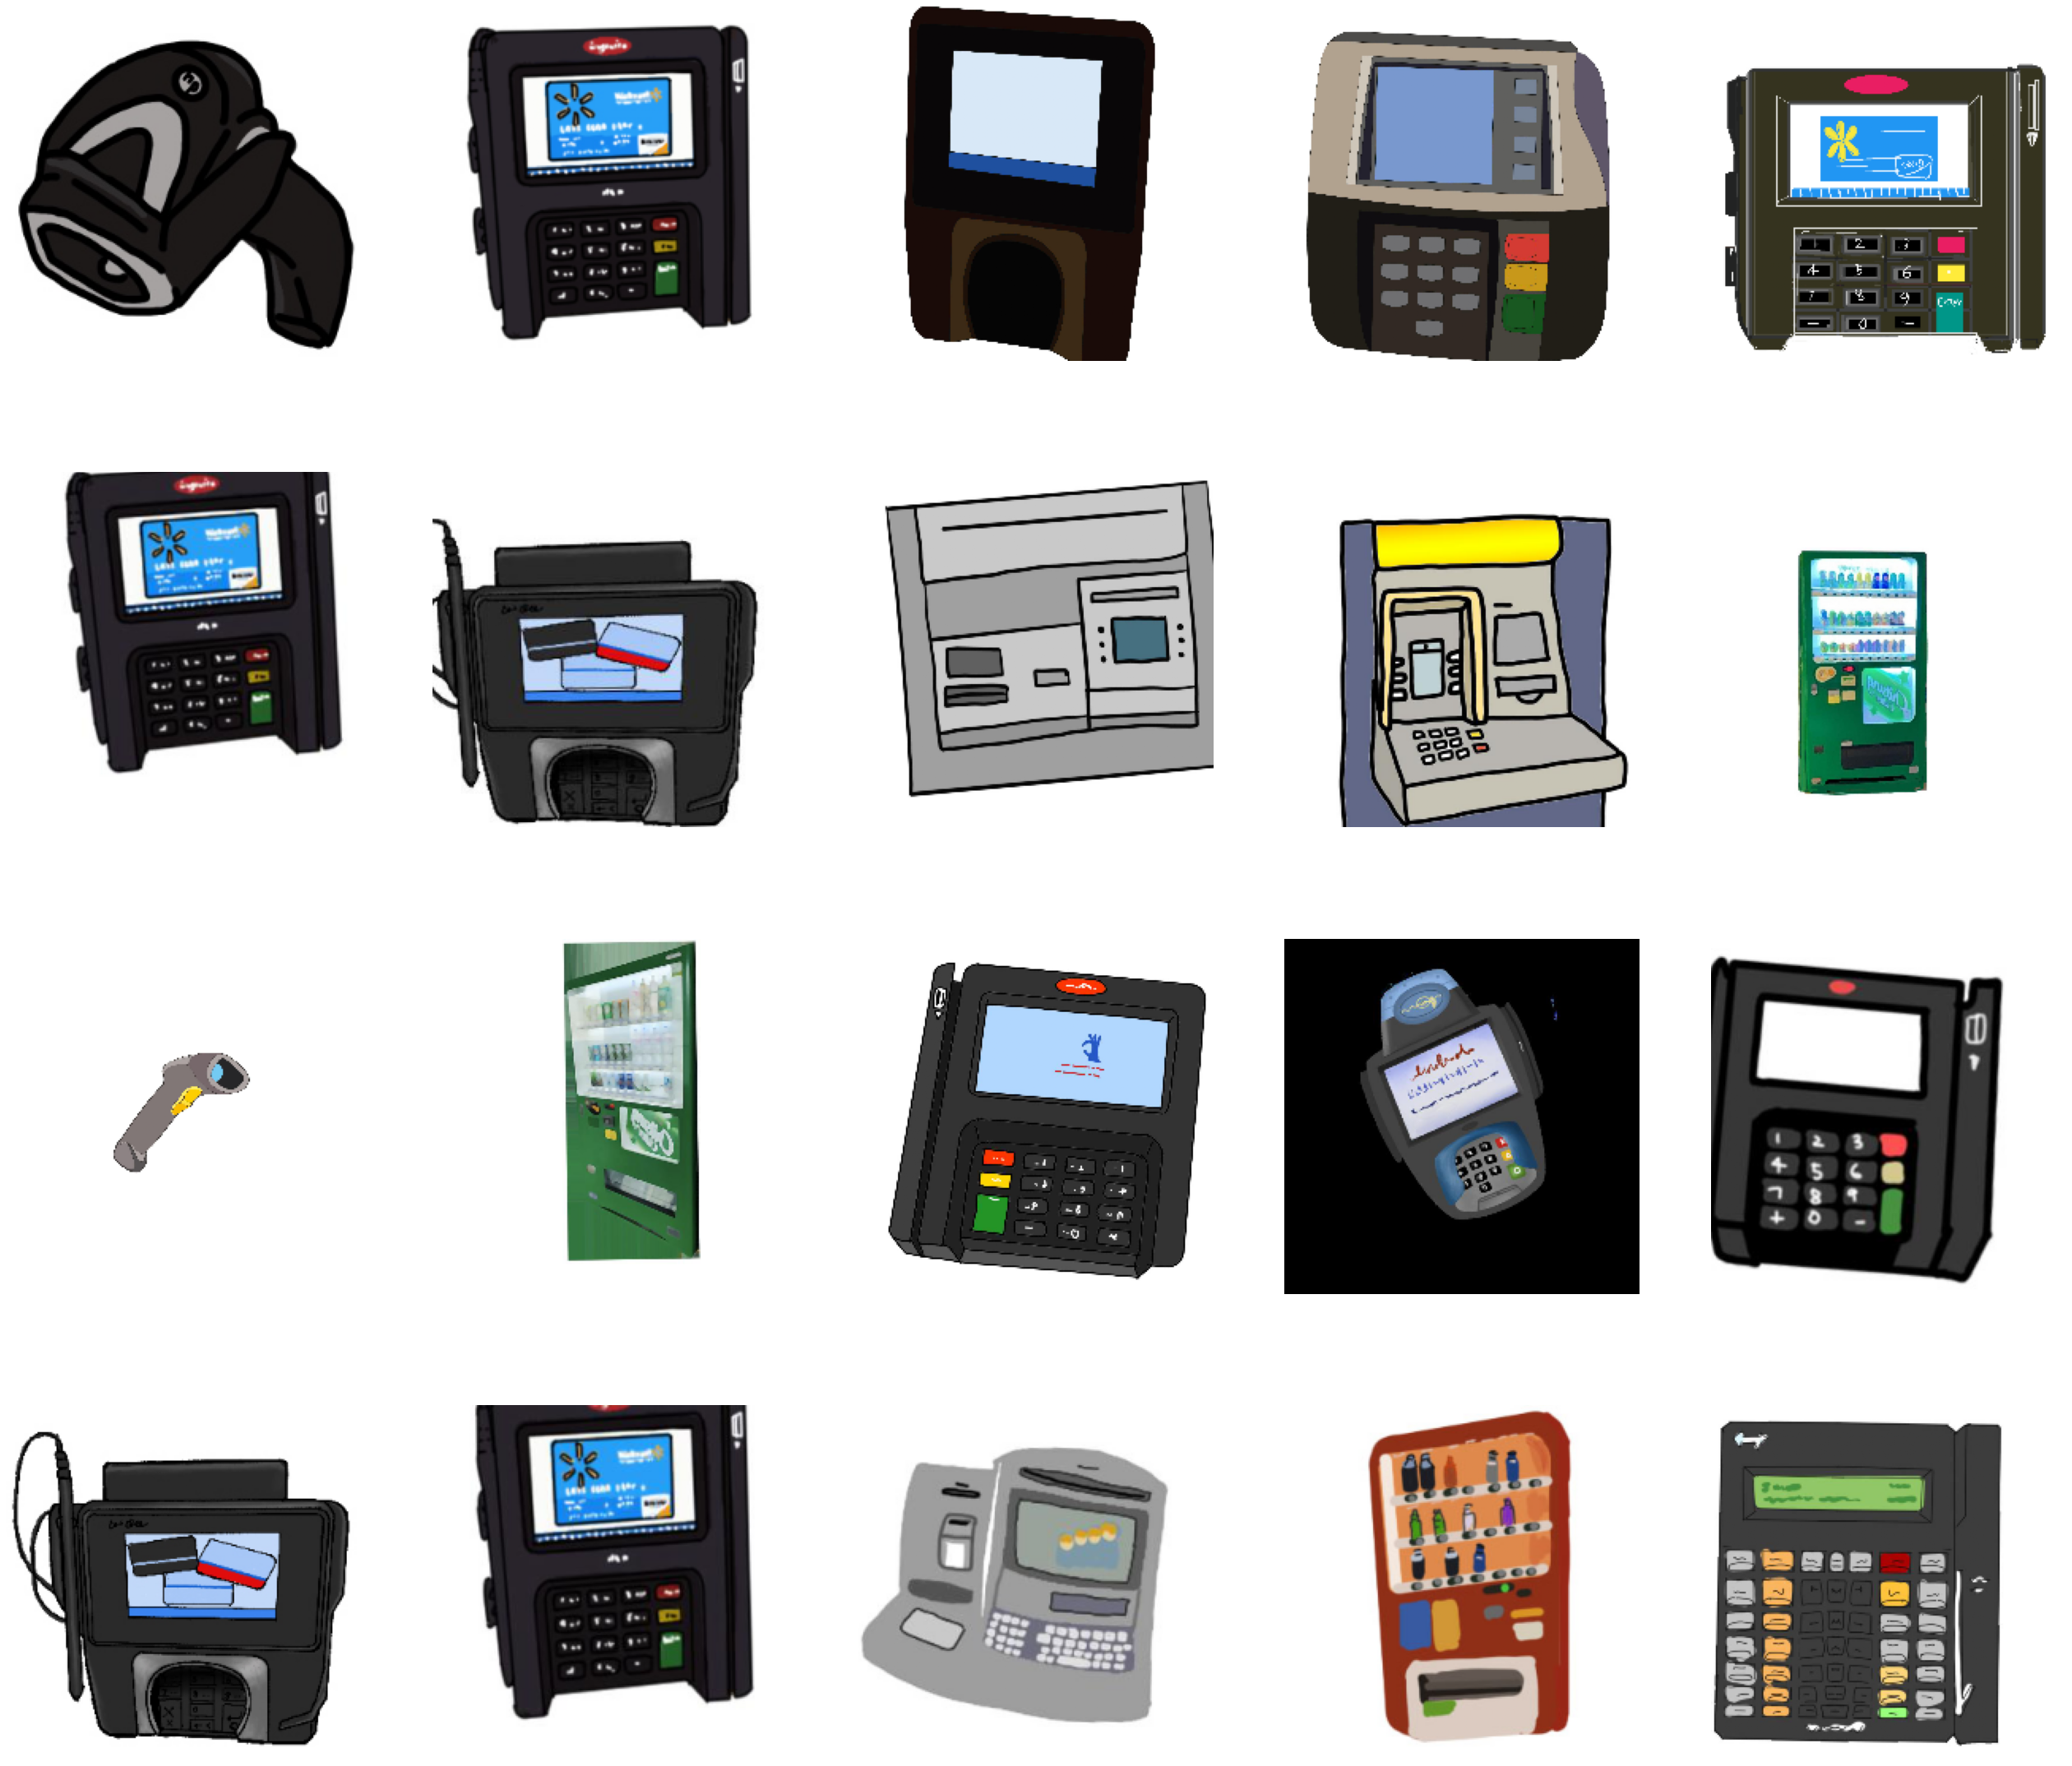

In [ ]:
imgs=get_imgs(all_data,diff_indices2[220:240])
show_images2(imgs)

In [ ]:
print(diff3.iloc[220:240,:].predict3.values)
print(diff3.iloc[220:240,:].predict2.values)
print(diff3.iloc[220:240,:].predict1.values)

[0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0]
[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1]
[1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1]


In [ ]:
diff3.iloc[280:300,:]


address  category  predict1  predict2  predict3
4256  vfgtlaganckxzegubqmt         3         1         1         0
4260  vsouzaiacfklxlcdbsfh         3         1         1         0
4275  wnvwyxnjtrbmhldocerc         3         0         0         1
4303  ylwwwqepxocmtppmrozu         3         1         1         0
4326  zwbehjvcrmrcenwtmevs         3         1         1         0
4412  exnvonenhlvkwxilgepk         4         0         0         1
4538  mtkjpvwllyqpiaybybny         4         0         0         1
4607  rabhvoppuxwwfyngihyn         4         1         1         0
4696  xnywobdzwmldmdhaksrj         4         0         0         1
4772  azqkmzpijodmzgjaujtb         5         0         0         1
4810  ccpovuoxhwooanyqmywz         5         0         1         1
4842  djgifmianqzoqedolhrq         5         1         1         0
4866  ekgtytrtetgkywnanigg         5         0         1         1
5015  jbtroynplafsbmmbhfhj         5         0         0         1
5040  kblkdwuuewwiszidusmm         5         0         0         1
5043  kcnxgmiudwebbuqxaarl         5         0         0         1
5054  kluockeudauzgzavcvyf         5         0         1         1
5058  knizyuzvmguipjabuyzv         5         1         1         0
5087  lgykstymeikeknwfvwon         5         0         1         1
5112  mfdiqrtmawbdtcfztghq         5         0         0         1

In [ ]:
diff3.iloc[200:300,:]

address  category  predict1  predict2  predict3
3288  ppziqvbqswabxlubxsku         2         1         1         0
3310  qdseqfvfkrpzlbevifvq         2         0         0         1
3316  qeymgpujcxquasodynep         2         1         1         0
3317  qezbtuiwmwghdgrvjxjn         2         0         0         1
3318  qfougwyvbgrxjqsimjal         2         1         1         0
...                    ...       ...       ...       ...       ...
5043  kcnxgmiudwebbuqxaarl         5         0         0         1
5054  kluockeudauzgzavcvyf         5         0         1         1
5058  knizyuzvmguipjabuyzv         5         1         1         0
5087  lgykstymeikeknwfvwon         5         0         1         1
5112  mfdiqrtmawbdtcfztghq         5         0         0         1

[100 rows x 5 columns]

## 앙상블

In [ ]:
df_total['cnt']=df_total['predict1'] + df_total['predict2'] +df_total['predict3']
df_total

address  category  predict1  predict2  predict3  cnt
0      aamhfbsxjoqkqsxnnpoy         0         0         0         0    0
1      aatdcomdixgejmiibsft         0         0         0         0    0
2      aatmmprdzkzdkbfcslkx         0         0         0         0    0
3      abaoovbyxzqodvhoasko         0         0         0         0    0
4      abymagsohyagiheolkhk         0         0         0         0    0
...                     ...       ...       ...       ...       ...  ...
25498  zslxpqgjoxxxnfcgaqbc        19         0         0         0    0
25499  ztedlwqpolocumvrpkdt        19         0         0         0    0
25500  zukfkicrimhykqtrxkbe        19         0         0         0    0
25501  zvpheaqohuqevixkjspd        19         0         0         0    0
25502  zwioxnzjuiufsjztftts        19         0         0         0    0

[25503 rows x 6 columns]

In [ ]:
print(f'앙상블결과 삭제할 이미지 숫자 : {sum(df_total.cnt>=2)}')
print(f'앙상블결과 삭제할 이미지의 비율 : {round(np.mean(df_total.cnt>=2)*100,2)}%')

앙상블결과 삭제할 이미지 숫자 : 2193
앙상블결과 삭제할 이미지의 비율 : 8.6%


In [ ]:
#cnt>=2인 경우 제거해야할 실제사진들의 경로 추출
cnt_2_images_path = []
for path_idx in range(len(all_data.imgs)):
  if df_total.cnt.values[path_idx] >=2:
    cnt_2_images_path.append(all_data.imgs[path_idx][0])
len(cnt_2_images_path)

2193

## 일단 이건 보류 , cnt값의 기준을 다시 봐야할 필요가 있음
- 보팅기준 2
- 3모델 중 2개이상이 이상치라 할 경우 삭제~!~!


In [ ]:
df_total.cnt.value_counts()

0    22742
3     1818
1      568
2      375
Name: cnt, dtype: int64

In [ ]:
print(f'데이터 기존 이미지 갯수 : {len(df)}')
print(f'확률분포모델에서 실제사진이라 판단한 이미지 : {sum(df_total.predict1==1)}')
print(f'확률분포모델에서 추상이미지라 판단한 이미지 : {len(df_total)-sum(df_total.predict1==1)}')
print(f'K-means모델에서 실제사진이라 판단한 이미지 : {sum(df_total.predict2==1)}')
print(f'K-means모델에서 추상이미지라 판단한 이미지 : {len(df_total)-sum(df_total.predict2==1)}')
print(f'Yolo모델에서 실제사진이라 판단한 이미지 : {sum(df_total.predict3==1)}')
print(f'Yolo모델에서 추상이미지라 판단한 이미지 : {len(df_total)-sum(df_total.predict3==1)}')
print(f'앙상블결과 삭제할 이미지 숫자 : {sum(df_total.cnt>=2)}')
print(f'앙상블결과 삭제할 이미지의 비율 : {round(np.mean(df_total.cnt>=2)*100,2)}%')
print(f'앙상블결과 남은 이미지의 숫자 : {len(df)-sum(df_total.cnt>=2)}')

데이터 기존 이미지 갯수 : 25503
확률분포모델에서 실제사진이라 판단한 이미지 : 2201
확률분포모델에서 추상이미지라 판단한 이미지 : 23302
K-means모델에서 실제사진이라 판단한 이미지 : 2423
K-means모델에서 추상이미지라 판단한 이미지 : 23080
Yolo모델에서 실제사진이라 판단한 이미지 : 2148
Yolo모델에서 추상이미지라 판단한 이미지 : 23355
앙상블결과 삭제할 이미지 숫자 : 2193
앙상블결과 삭제할 이미지의 비율 : 8.6%
앙상블결과 남은 이미지의 숫자 : 23310


## 이미지 삭제하기!

In [ ]:
"""for path in cnt_2_images_path:
  print(path)
  os.remove(path)
"""

/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/amciivgxjoagcydlzvot.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/amixvvxcbjsunejbypqu.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/ayfkbqycvxosdoorkiii.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/ayhvjsjlovsjdudaeswa.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/bbfurfimzjxfskhzhmtg.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/cuthfbmtlhyulupmwsby.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/cxxtkabbzbercodcnqyb.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/detdyxyplaeexxtcdefa.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/enwjejcmcshcdrypglna.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/evdhrtiqztggkbnfmiuw.png
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/fyukdfxpwpkvgagirihw.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/gmwaqzusvaoueermrnor.jpg
/content/drive/MyDrive/datasets/대학부 데이터셋 (2)/L2_10/gyqtkbtozfbdzmdxllal.jpg
/content/dri

In [ ]:
#제거되었는지 확인
tmp=torchvision.datasets.ImageFolder('/content/drive/MyDrive/datasets/대학부 데이터셋 (2)')
tmp
#25503 -> 23310!

Dataset ImageFolder
    Number of datapoints: 23310
    Root location: /content/drive/MyDrive/datasets/대학부 데이터셋 (2)